# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.metrics import mean_squared_error, r2_score #avaliar predicao da regressao linear

# Dataset

In [2]:
df = pd.read_csv("C:/Users/thici/OneDrive/Documents/Machine-learning-models/Regressão/Salary.csv")

df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Analise descritiva

In [3]:
#verificando dimensão
df.shape

(35, 2)

O dataset possui 35 dados e 2 variaveis

In [4]:
df.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [5]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


A média de experiência é de 6,3 anos e a mediana de 5,3 anos, indicando uma distribuição relativamente equilibrada. O salário médio é de cerca de 83,9 mil reais, com mediana próxima de 81,3 mil, o que também sugere simetria nos dados. A variação salarial é significativa, com desvio padrão de aproximadamente 32 mil reais, evidenciando que a remuneração cresce de forma expressiva ao longo da carreira. Observando os quartis, nota-se que profissionais com cerca de 3,4 anos ganham em torno de 57 mil reais, enquanto aqueles com mais de 9 anos alcançam valores acima de 113 mil.

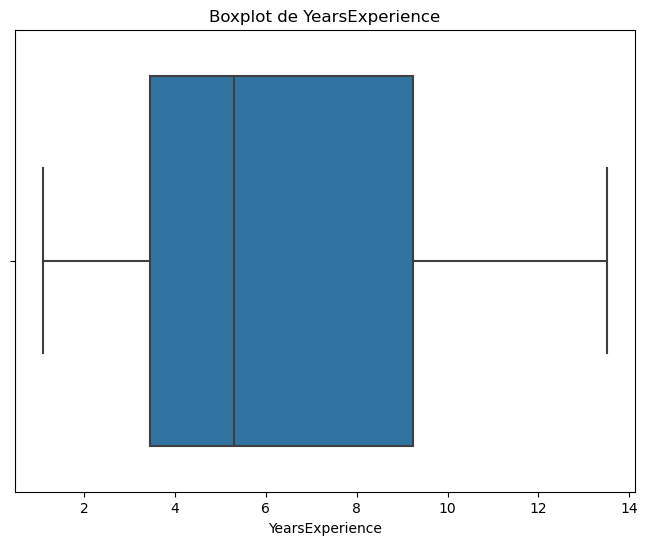

<Figure size 640x480 with 0 Axes>

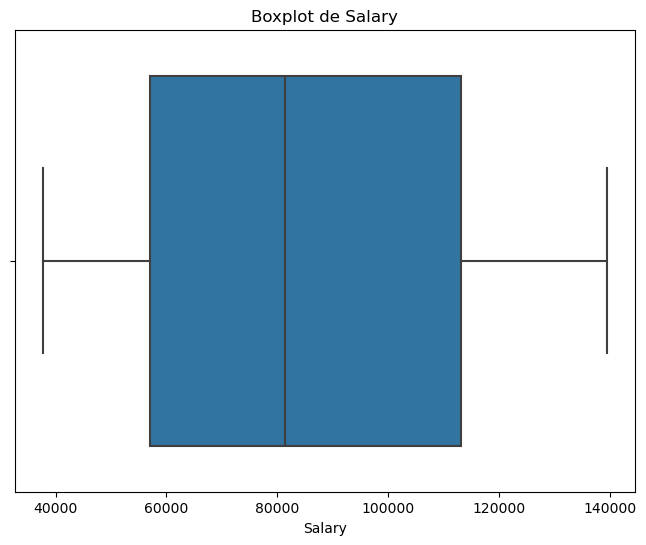

<Figure size 640x480 with 0 Axes>

In [6]:
#boxplot para cada variavel
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()
    time.sleep(1)
    plt.close()
    time.sleep(1)
    plt.clf()

Através dos boxplots podemos observar que realmente os dados estão simetricos e sem outliers. Com isso, não é necesssario fazer tratamento nesses dados

In [7]:
X = df['YearsExperience']
y = df['Salary']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

Utilizando o metodo holdout, foi dividido os dados entre 30% teste e 70% treino.

# Regressão linear sem Scikit-learn

## Modelo Matemático

O modelo básico da regressão linear simples é:

$
y = b_0 + b_1 x
$

Onde:

- **\( y \)** → variável resposta (ex: salário)  
- **\( x \)** → variável explicativa (ex: anos de experiência)  
- **\( b_0 \)** → intercepto (valor de \( y \) quando \( x = 0 \))  
- **\( b_1 \)** → coeficiente angular (inclinação da reta)

---

In [8]:
def media (valores):
  return valores.mean()

## Cálculo dos Coeficientes

Os parâmetros são obtidos minimizando o erro quadrático:

$
b_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$

$
b_0 = \bar{y} - b_1 \bar{x}
$

---

Esses calculos serão feitos pelas funções  numerador e denominador

In [9]:
def numerador(valores_x, valores_y, media_y, media_x):
    soma = 0
    for i in range(len(valores_x)):
        x = valores_x.iloc[i] - media_x
        y = valores_y.iloc[i] - media_y
        soma += x * y
    return soma

In [10]:
def denominador(valores_x, media_x):
    return ((valores_x - media_x) ** 2).sum()


In [11]:
media_x = media(X_treino)
media_y = media(y_treino)

print(media_x,media_y)

numer = numerador(X_treino, y_treino, media_y, media_x)
deno = denominador(X_treino, media_x)
print(deno, numer)

b1 = numer/deno
print(b1)

6.416666666666667 84498.83333333333
380.61333333333334 3256276.166666666
8555.339189378545


In [12]:
b0 = media_y - b1*media_x
print(b0)

29602.073534821


### Erro (Resíduo)

$
e_i = y_i - \hat{y}_i
$

---

### Erro Quadrático Médio (MSE)

$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

---

### Raiz do Erro Quadrático Médio (RMSE)

$
RMSE = \sqrt{MSE}
$

---

### Coeficiente de Determinação \( $R^2$ \)

$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$

---
### Função Objetivo (Mínimos Quadrados)

$
\min \sum_{i=1}^{n} (y_i - (b_0 + b_1 x_i))^2
$

In [13]:
def erro(valores_x, valores_y,media_y, b0, b1 ):
  result=[]
  for i in valores_x:
    result.append(b0 + b1*i)
  difer = valores_y - result
  return difer

def mse (valores_x, valores_y,media_y, b0, b1 ):
  err = erro(valores_x, valores_y,media_y, b0, b1)
  sum=0
  for i in err:
    sum+= i**2
  return sum/len(valores_x)

In [14]:
rmse = np.sqrt(mse(X_teste, y_teste,media_y, b0, b1 ))
print(f'RMSE: {rmse}')


RMSE: 7046.1046792620045


In [15]:
def cofiec_det(valores_x, valores_y,media_y, b0, b1 ):
  err = erro(valores_x, valores_y,media_y, b0, b1)
  sum=0
  for i in err:
    sum+= i**2
  r = 1 - (sum/denominador(valores_y, media_y))
  return r

In [17]:
r2 = cofiec_det(X_teste, y_teste,media_y, b0, b1 )
print(f'R²: {r2}')

R²: 0.9175688876129615


In [18]:
print('y=',b0,'+',b1,'x')

y= 29602.073534821 + 8555.339189378545 x


# Regressão com Scikit-learn

In [19]:
X_treino_d = X_treino.values.reshape(-1, 1)
X_teste_d  = X_teste.values.reshape(-1, 1)
y_treino_d = y_treino.values.reshape(-1, 1)
y_teste_d  = y_teste.values.reshape(-1, 1)

In [20]:
regressao_linear = LinearRegression()
#treinando modelo
regressao_linear.fit(X_treino_d, y_treino_d)

LinearRegression()

In [21]:
#predicao
y_pred_rl = regressao_linear.predict(X_teste_d)

In [22]:
#rmse e R² - teste
rmse_rl = np.sqrt(mean_squared_error(y_teste_d, y_pred_rl))
r_rl = r2_score(y_teste_d, y_pred_rl)

print(f'RMSE: {rmse_rl}')
print(f'R²: {r_rl}')

RMSE: 7046.1046792620045
R²: 0.9171426108885095


In [27]:
df_metricas = pd.DataFrame({
    "Modelo": ["Manual", "Scikit-Learn"],
    "RMSE": [rmse, rmse_rl],
    "R2": [r2, r_rl]
})



# Visualização do modelo

In [24]:
y_pred_manual = b0 + b1 * X_teste

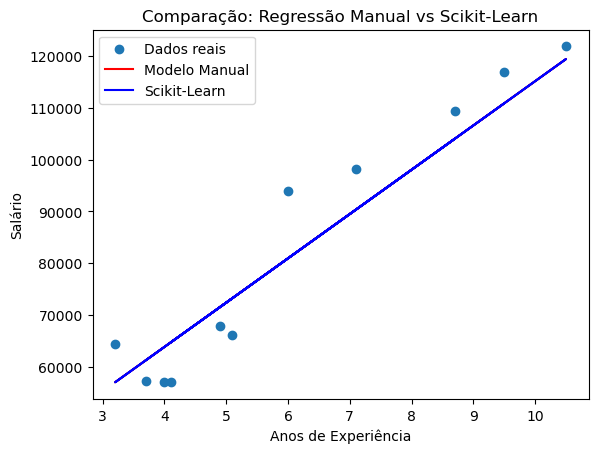

,Modelo,RMSE,R2
0,Manual,7046.104679,0.917569
1,Scikit-Learn,7046.104679,0.917143


In [26]:

plt.figure()

# pontos reais
plt.scatter(X_teste, y_teste, label="Dados reais")

# reta manual
plt.plot(X_teste, y_pred_manual, label="Modelo Manual", color="red")

# reta scikit
plt.plot(X_teste, y_pred_rl, label="Scikit-Learn", color="blue")

plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.title("Comparação: Regressão Manual vs Scikit-Learn")

plt.legend()
plt.show()

df_metricas

O gráfico mostra que as duas retas, a da regressão calculada manualmente e a gerada pelo Scikit-Learn, estão praticamente sobrepostas, indicando que o modelo implementado manualmente está correto, o que é esperado visto que as metricas de ambos os modleos foram iguais. Ambas representam bem a tendência crescente entre anos de experiência e salário, evidenciando uma forte relação linear positiva: à medida que a experiência aumenta, o salário também cresce de forma consistente. Os pontos reais se distribuem próximos à reta, o que sugere um bom ajuste do modelo aos dados.